In [48]:
import os
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from brain_decoding.config.file_path import RESULT_PATH
from brain_decoding.utils.plot import prediction_curve


activation_path = os.path.join(
    RESULT_PATH, 
    '8concepts/562_None_multi-vit_test_optimalX_CARX_2024-10-18_17-12-44/memory/prediction/epoch40_test_2_results.npy'
)

result_path = os.path.join(
    RESULT_PATH, 
    '8concepts/562_None_multi-vit_test_optimalX_CARX_2024-10-18_17-12-44/memory/prediction/epoch40_activation.png'
)

labels = ['White House', 'CIA', 'Hostage', 'Handcuff', 'Jack', 'Bill', 'Fayed', 'Amar']
predictions = np.load(activation_path)
predictions.shape


(10000, 8)

In [49]:
np.sum(predictions, axis=1)

array([0.34988695, 0.32586597, 0.72935996, ..., 2.66816727, 1.48722238,
       1.26214049])

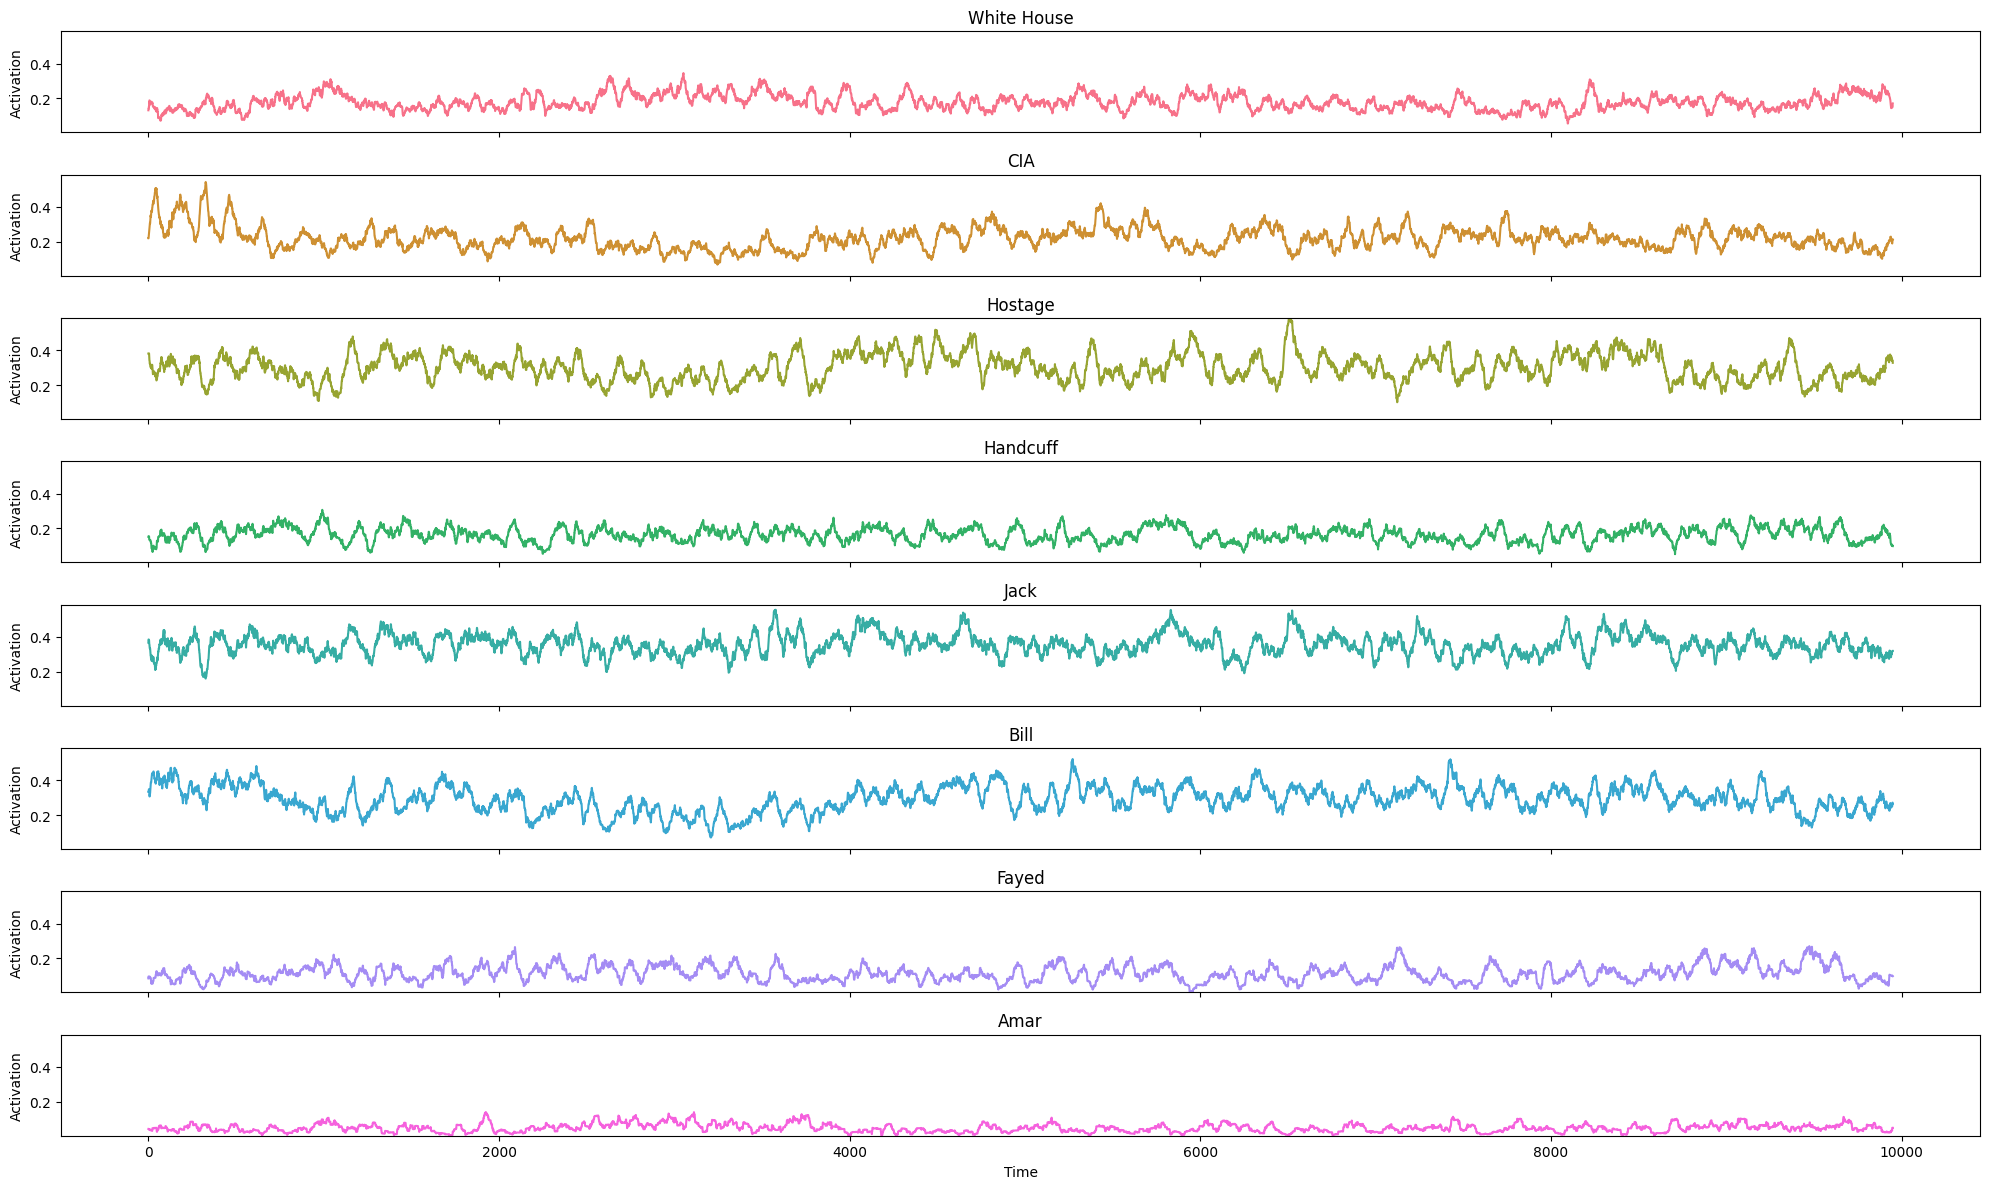

In [50]:
# Function to apply moving average smoothing
window_size = 50

def smooth_data(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Example data: N x 8 matrix
N = predictions.shape[0]
smoothed_predictions = np.zeros((N - window_size + 1, predictions.shape[1]))  # Adjust size for smoothing

# Smoothing each column (line)
for i in range(predictions.shape[1]):
    smoothed_predictions[:, i] = smooth_data(predictions[:, i], window_size=window_size)

prediction_curve(smoothed_predictions, labels, result_path)